In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import scipy.optimize as opt;

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (21, 10)

## Exercise 2.01 ##
In this exercise we are required to evaluate the integral
$$I=\int_{0}^{1}\frac{\pi}{2}cos(\pi x/2)$$
via Montecarlo integration.
At first we get an estimation for the integral $\hat{I}$ a random uniform sampling between $0$ and $1$, and then we sample from a distribution that resembles the function we want to integrate. The amount of information we have on the function we want to integrate is crucial: in this case we used a quadratic functions in the form:
$$f(x)=\frac{3(1-x^2)}{2}$$
This is a parabola, and the coice of a parabola is driven by its resemblance with the cosine graph. To sample from a parabola we chose the rejection method: we pick a random number $X$ between $0$ and $1$ and a random number $Y$ between $0$ and $\text{max}_{[0,1]}(f(x))=3/2$ and we accept $X$ if $f(X)<Y$

In [3]:
df=pd.read_csv(".\monteCarloIntegration\monteCarloIntegration.csv")
df.head(10)

,uniformSampling,uniformError,importanceSampling,importanceError
0,0.999952,0.000000,1.000550,0.000000
1,0.998975,0.000977,1.000460,0.000082
2,1.000190,0.001338,1.000140,0.000328
3,1.000020,0.000961,1.000100,0.000235
4,0.999917,0.000751,0.999993,0.000212
5,0.999961,0.000615,0.999969,0.000174
6,0.998076,0.001956,0.999913,0.000158
7,0.998538,0.001755,0.999985,0.000154
8,0.998060,0.001620,0.999942,0.000143
9,0.998481,0.001509,0.999918,0.000130


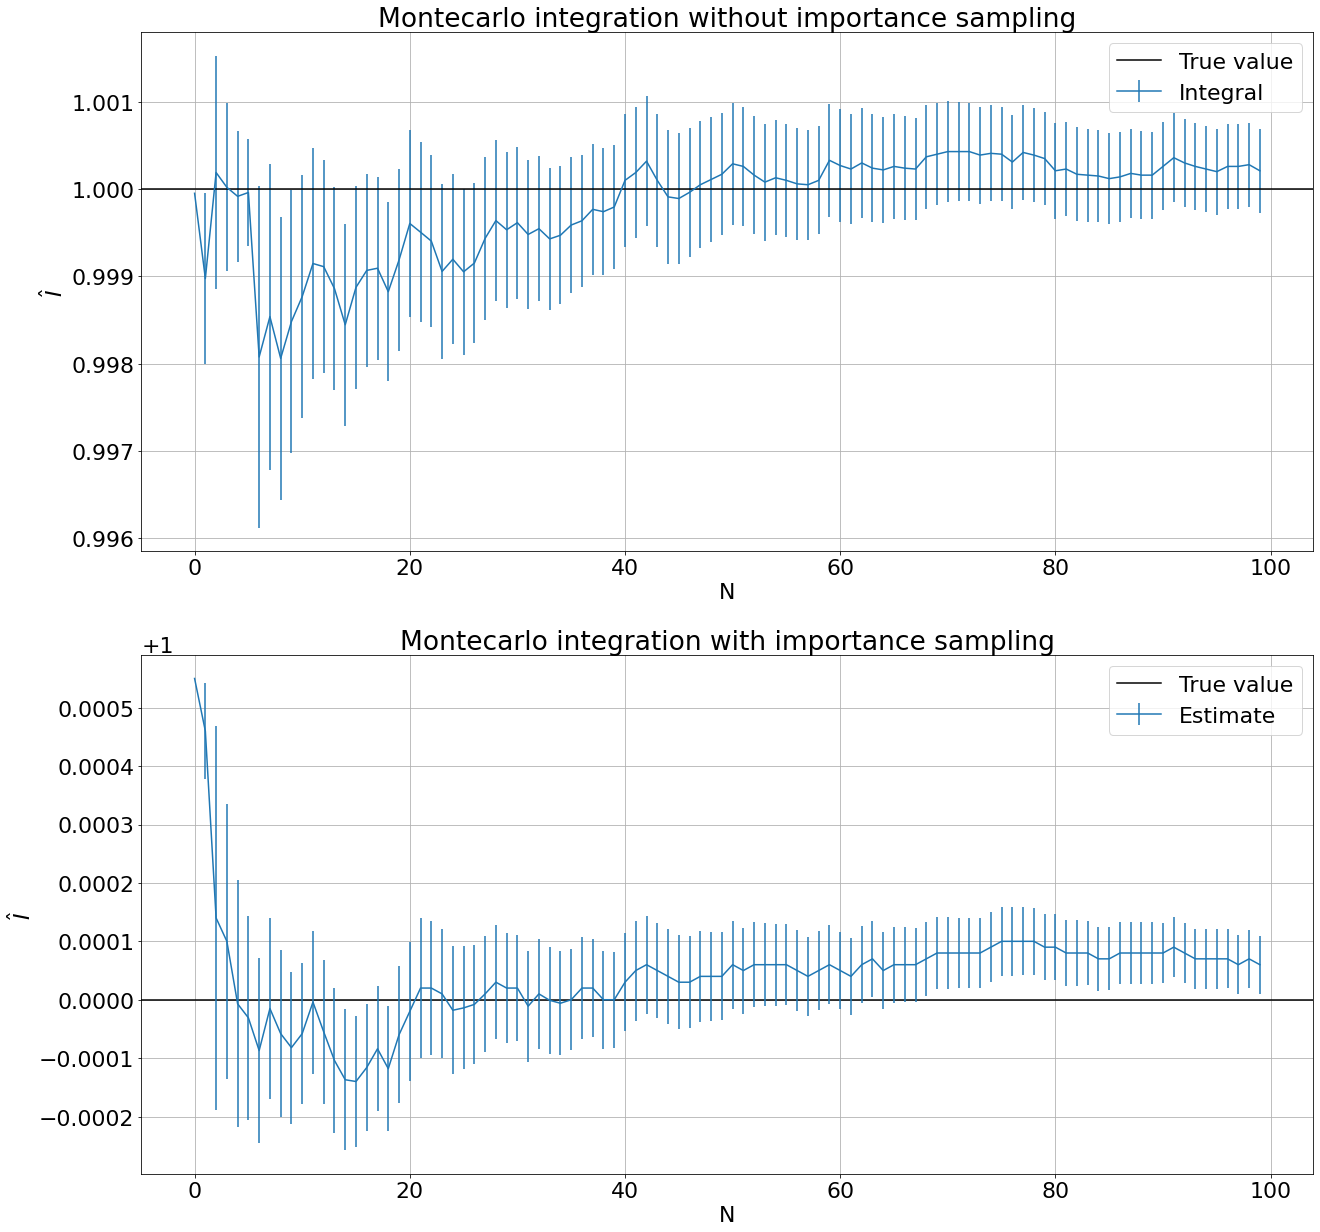

In [4]:

plt.rcParams["figure.figsize"] = (21, 21)
fig,axs=plt.subplots(2,1);
N=df.uniformSampling.size;
axs[0].errorbar(x=range(N), y=df.uniformSampling, yerr=df.uniformError, label="Integral");
axs[0].axhline(1,color="black",label='True value')
axs[0].set_xlabel("N");
axs[0].set_ylabel(r'$\hat{I}$');
axs[0].legend();
axs[0].grid();
axs[0].set_title("Montecarlo integration without importance sampling");
axs[1].axhline(1,color="black",label='True value')
axs[1].errorbar(x=range(N), y=df.importanceSampling, yerr=df.importanceError,label='Estimate');
axs[1].set_xlabel("N");
axs[1].set_ylabel(r'$\hat{I}$');
axs[1].set_title("Montecarlo integration with importance sampling");
axs[1].legend();
axs[1].grid();
plt.rcParams["figure.figsize"] = (21, 10)

To get a feeling of how much precision we gained by using importance sampling we can plot the error of the two methods side by side:

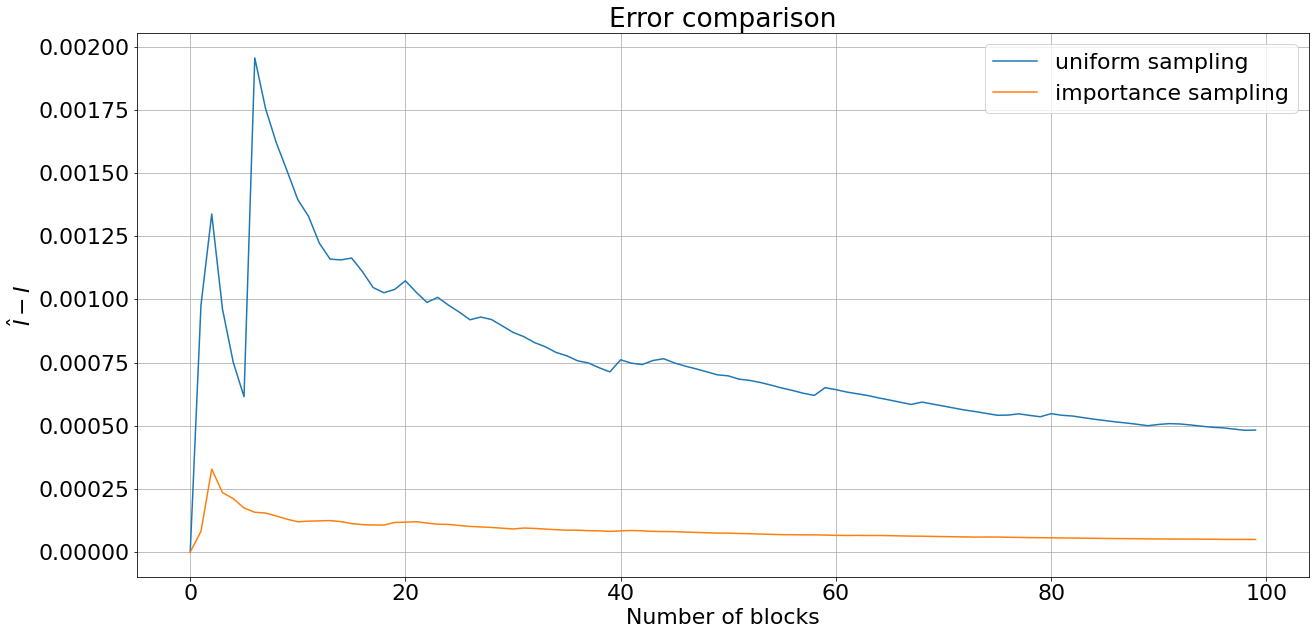

In [5]:
plt.plot(range(N),df.uniformError, label='uniform sampling');
plt.plot(range(N),df.importanceError, label='importance sampling');
plt.xlabel('Number of blocks');
plt.ylabel(r'$\hat{I}-I$');
plt.title('Error comparison');
plt.grid()
plt.legend();

We see an undeniable gain in precision, but this analysis doesn't account for time, which would be a decisive choice: the gain in precision should be high enough to compensate for the time we spend to sample from a non-uniform pdf. In this case we are using a rejection method, so a first look at how efficient our algorithm is can be obtained by looking at the acceptance rate: in the next block we show the histogram of the acceptance rates

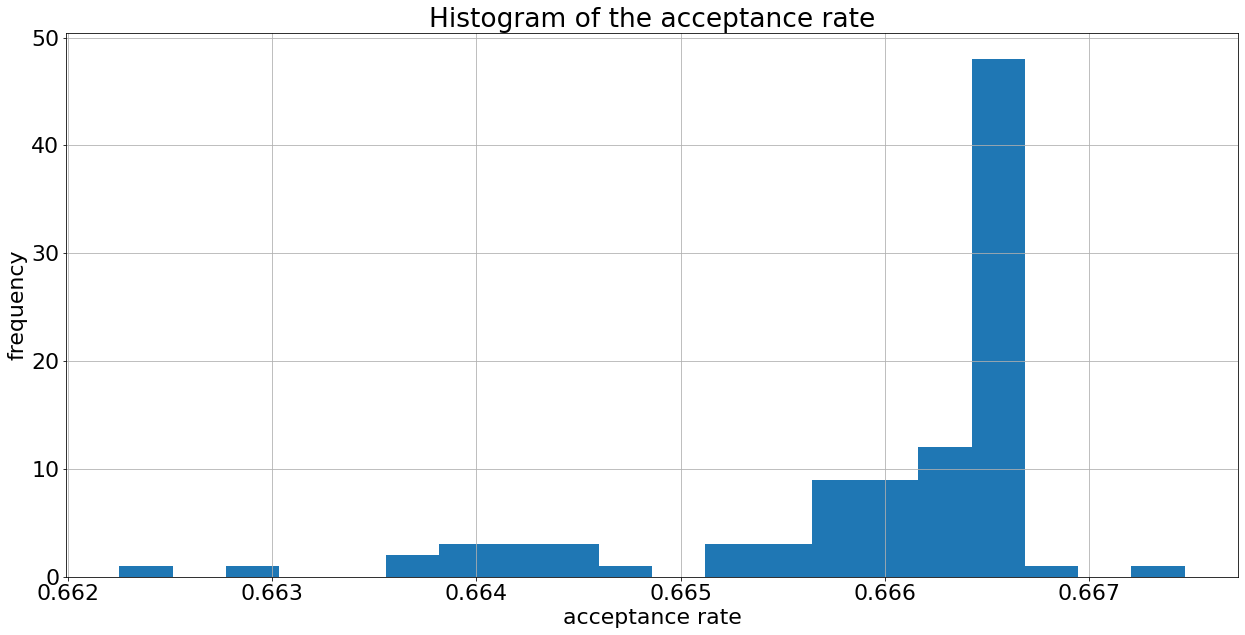

In [6]:
df=pd.read_csv(r'.\monteCarloIntegration\acceptanceRate.csv')
plt.hist(df.acceptanceRate, bins=20);
plt.title("Histogram of the acceptance rate")
plt.ylabel("frequency");
plt.xlabel("acceptance rate");
plt.grid()

This is not unexpected: we are generating points in the square $[0,1]\times[0,1.5]$, and we are keeping it only if it is under the parabola $y=3(1-x^2)/2$. The area under the parabola is exactly $1$, so on average we are keeping $1/1.5$ points. Therefore for importance sampling, excluding the time needed to compute $f(X)$ we need to sample from the uniform distribution $3/2$ of the points, but the statistical uncertainty falls of a order of magnitude, and we can conclude that importance sampling is advantageous if $f(X)$ is computationally light enough.

## Exercise 2.02 ##
In this exercise we are required to simulate two random walkers: at every discrete timesteps the first take a step towards a nearest neighbour point on a 3d lattice, while the second take a random steps of unitary length towards a direction sampled from a uniform distribution.

To test the statistics of the random walkers we sampled $M=100$ trajectories for $N=100$ times, we computed $\langle\sigma^2(t)\rangle$ in each block and then averaged it over the $100$ realizations. This also gives us a statistical unceratinty. The next block illustrates the results with the respective statistical uncertainties. The trajectories are $100$ steps long

In [7]:
df=pd.read_csv(r".\randomWalkSimulation\randomWalkerMSD.csv")
df.t=df.t+1;
df.head(10)

,t,discreteMSD,discreteError,continueMSD,continueError
0,1,1.00000,0.000000,1.00000,0.000000
1,2,2.00134,0.034445,2.00887,0.040215
2,3,3.00202,0.044665,3.00725,0.047793
3,4,4.00158,0.057902,4.01947,0.053080
4,5,4.99428,0.059647,5.02275,0.052152
5,6,5.99672,0.065940,6.01649,0.057999
6,7,6.98796,0.070526,6.99600,0.064647
7,8,7.98236,0.072999,7.98434,0.066508
8,9,8.99682,0.079471,9.00496,0.074621
9,10,9.98054,0.082823,10.00050,0.076836


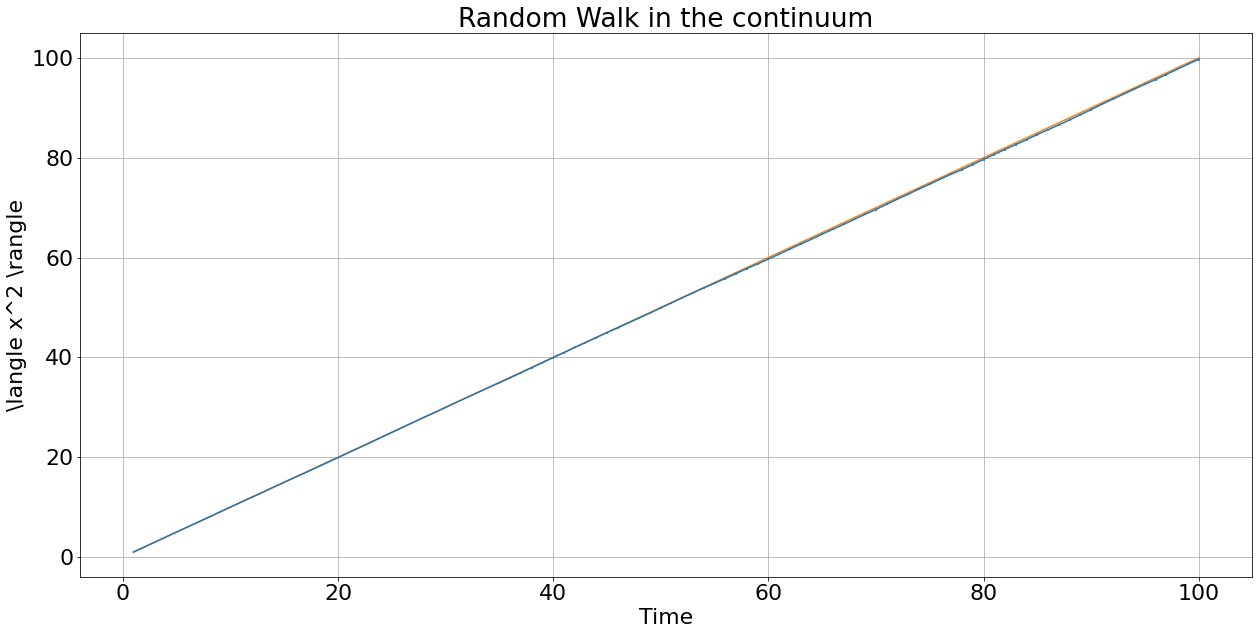

In [8]:
xdata=df.t
ydata=df.continueMSD


plt.errorbar(x=xdata, y=ydata, yerr=df.continueError,label='Simulation');
plt.plot(xdata,xdata,label='Expected result')
plt.title("Random Walk in the continuum");
plt.grid()
plt.xlabel("Time");
plt.ylabel(r"\langle x^2 \rangle");

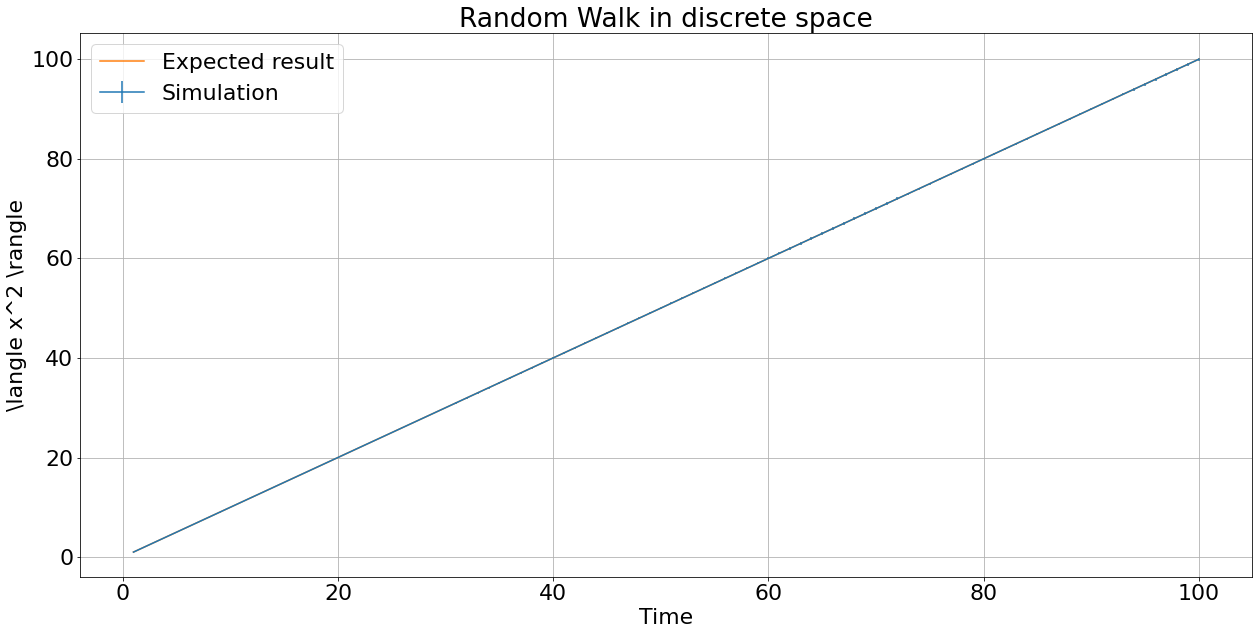

In [9]:
xdata=df.t
ydata=df.discreteMSD

plt.errorbar(x=xdata, y=xdata, yerr=df.discreteError,label='Simulation');
plt.plot(xdata,xdata,label='Expected result')
plt.title("Random Walk in discrete space");
plt.xlabel("Time");
plt.ylabel(r"\langle x^2 \rangle");
plt.grid();
plt.legend();

As we can our data are compatible with a straight line. This doesn't surprise us, because an unbiased random walk, whether on a lattice or on $\mathbb{R}^3$ is the paradigmatic example of a diffusive behaviour, which is strictly identified by a linear relationship between the MSD and time. In fact, the phenomena that deviates from the linear law are usually described by the term *anomalous diffusion*.
For a jump process we always have non-anomalous diffusion if the distributions of the jumps length $\psi$ and the distribution of the waiting times between two consecutive jumps $\phi$ have finite mean and variance.
In both cases the probability distribution for the jumping time is given by:
$$\phi(t)=\delta(t-1)$$
while the  probability distribution of the jump length is uniformly distributed on the unit 3D sphere in the continue case and is given by:
$$\psi({\vec{r}})=\sum_{x_i}\delta(\vec{r}-\vec{x_i})$$
in the discrete case ($x_i$ runs over the nearest neighbour of the origin). Therefore  we expect a diffusive behavious in both cases. 